### QFT Example with 50 Hz + 100 Hz signal

In [1]:
# Required Libraries

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # Correctly import AerSimulator from qiskit_aer
from qiskit_aer.library import save_statevector  # Import save_statevector to save results
from qiskit.circuit.library import QFT

In [22]:
# Number of qubits
n_qubits = 8

# Sampling parameters
num_samples = 2 ** n_qubits
t = np.linspace(0, 1, num_samples, endpoint=False)

# Time-domain signal
freq1 = 50  # Frequency of the first sinusoid
freq2 = 100 # Frequency of the second sinusoid
signal = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# Input state for the QFT
# Normalization of the signal to fit into quantum states
normalized_signal = (signal - min(signal)) / (max(signal) - min(signal)) * (2 ** n_qubits - 1)
input_state = np.round(normalized_signal).astype(int)

# Quantum circuit
circuit = QuantumCircuit(n_qubits)

# Use of Hadamard gates to create superposition state
for i in range(n_qubits):
    circuit.h(i)

# QFT inverse
circuit.append(QFT(n_qubits, inverse=True), range(n_qubits))

# Save statevector to get results
circuit.save_statevector()

# Run circuit on simulator
simulator = AerSimulator()

# Transpile circuit for simulator
compiled_circuit = transpile(circuit, simulator)

# simulation and statevector
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()

# Frequency spectrum
frequency_spectrum = np.abs(statevector) ** 2

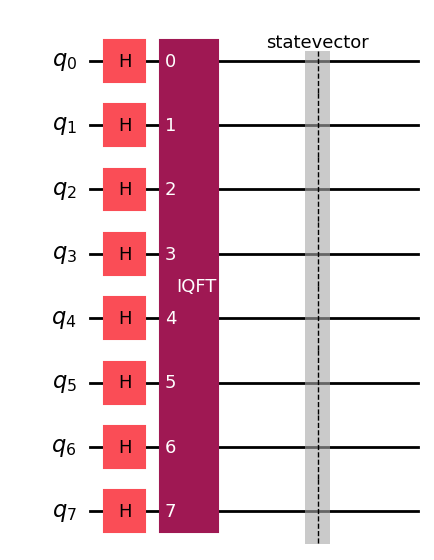

In [23]:
# Plot circuit
circuit.draw(output='mpl')

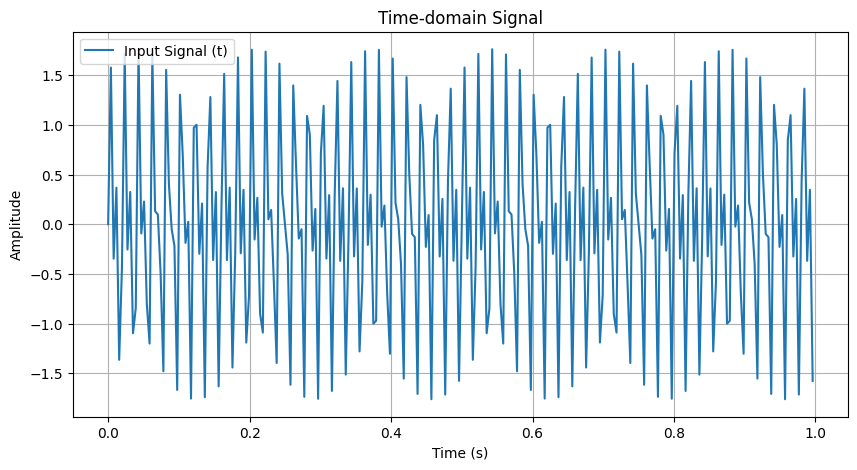

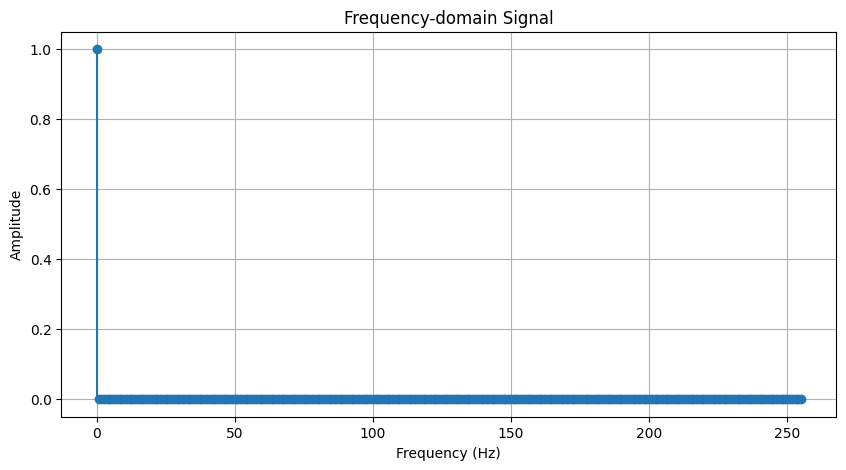

In [24]:
# PLOTS

# Time-domain Plot
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label='Input Signal (t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-domain Signal')
plt.grid(True)
plt.legend()
plt.show()

# Frequency-domain Plot
plt.figure(figsize=(10, 5))
plt.stem(range(num_samples), frequency_spectrum, basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency-domain Signal')
plt.grid(True)
plt.show()

### QFT Example with 0.5 Hz + 1 Hz signal, 50 Hz sampling rate

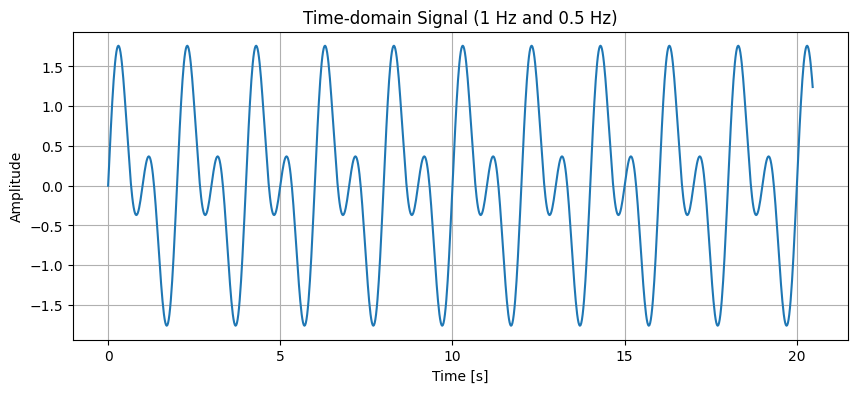

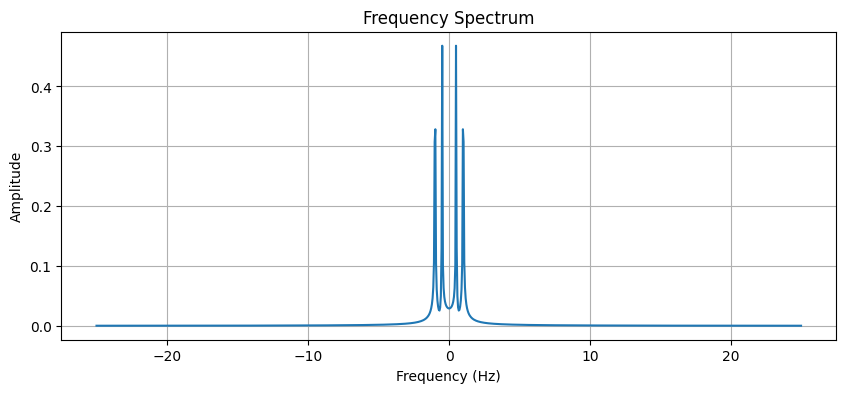

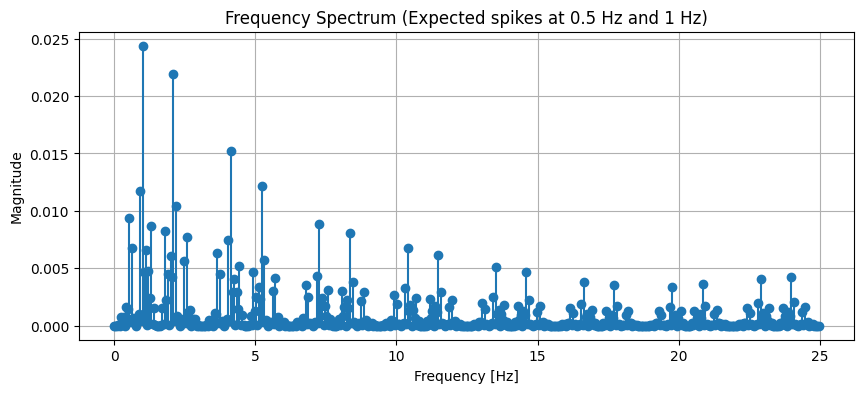

In [38]:
# Using 10 Qubits

# Number of qubits
n_qubits = 10

# Sampling parameters
num_samples = 2 ** n_qubits  # 1024 samples based on 10 qubits
sampling_rate = 50  # 50 Hz sampling rate
t = np.linspace(0, num_samples / sampling_rate, num_samples, endpoint=False)

# Time-domain signal with frequencies of 1 Hz and 0.5 Hz
freq1 = 1.0  # Frequency of the first sinusoid
freq2 = 0.5  # Frequency of the second sinusoid
signal = np.sin(2 * np.pi * freq1 * t) + np.sin(2 * np.pi * freq2 * t)

# Plot time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Time-domain Signal (1 Hz and 0.5 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

# Plot FFT
T_f = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), 1 / sampling_rate)
# Shift FFT for better visualization
T_f_shifted = np.fft.fftshift(T_f)
freqs_shifted = np.fft.fftshift(freqs)
# Frequency spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs_shifted, np.abs(T_f_shifted) / len(signal))  # Normalize magnitude
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

# Normalize the signal to fit the range [0, 1] for quantum state encoding
# Scaling the signal to the range [0, 2π] so we can use it as phase values in rotations
normalized_signal = (signal - min(signal)) / (max(signal) - min(signal)) * 2 * np.pi

# Quantum circuit to prepare the quantum states and perform the QFT
circuit = QuantumCircuit(n_qubits)

# Encode the signal into the quantum state using Ry rotations
# The encoding will use the normalized signal values to define quantum states
for i in range(num_samples):
    index = i % n_qubits  # cycling through qubits for multiple samples
    circuit.ry(normalized_signal[i], index)

# Apply the inverse QFT to extract the frequency information
circuit.append(QFT(n_qubits, inverse=True), range(n_qubits))

# Save the statevector to get the results after simulation
circuit.save_statevector()

# Initialize the AerSimulator (correctly imported)
simulator = AerSimulator()

# Transpile the circuit for simulator execution
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator and retrieve the statevector
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()

# Compute the frequency spectrum by squaring the magnitude of the statevector
frequency_spectrum = np.abs(statevector) ** 2

# Plotting the frequency spectrum
frequencies = np.fft.fftfreq(num_samples, 1 / sampling_rate)

# Filter out the negative frequencies for plotting
plt.figure(figsize=(10, 4))
plt.stem(frequencies[:num_samples // 2], frequency_spectrum[:num_samples // 2], basefmt=" ")
plt.title('Frequency Spectrum (Expected spikes at 0.5 Hz and 1 Hz)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()

plt.show()
